In [24]:
'''Usando algoritmo gradiente descendente para predizer através de regressão linear com uma única variável, os lucros de uma rede de food trucks em várias cidades, baseado no tamanho populacional.'''

'Usando algoritmo gradiente descendente para predizer através de regressão linear com uma única variável, os lucros de uma rede de food trucks em várias cidades, baseado no tamanho populacional.'

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
%matplotlib inline


In [25]:
'''Lendo arquivo fornecido com os valores de tamanho da população e lucro relacionado'''

'Lendo arquivo fornecido com os valores de tamanho da população e lucro relacionado'

In [12]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\ex1data1.txt'

ficheiro = open(arquivo, "r")

dados = pd.read_csv(ficheiro, names = ['Pop', 'Lucro'])

#print(dados.columns)
#print(dados.values)

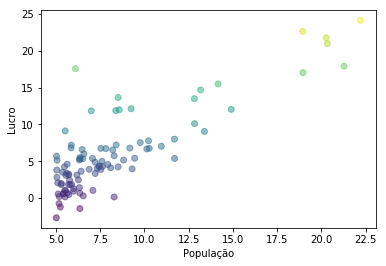

In [14]:
scatter_plot = plt.scatter(dados['Pop'], dados['Lucro'], alpha=0.5, 
                           c=dados['Lucro'])

plt.xlabel('População')
plt.ylabel('Lucro')
plt.show()


In [23]:
'''Podemos observar através do gráfico de dispersão acima, que existe um agrupamento relevante de food trucks em cidades com  com populção pequena, além disso, observamos uma tendência de aumento dos lucros em populações maiores'''


'Podemos observar através do gráfico de dispersão acima, que existe um agrupamento relevante de food trucks em cidades com  com populção pequena, além disso, observamos uma tendência de aumento dos lucros em populações maiores'

In [26]:
def computarCusto(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [28]:
dados.insert(0, 'Ones', 1)

In [29]:
# set X (training data) and y (target variable)
cols = dados.shape[1]
X = dados.iloc[:,0:cols-1]
y = dados.iloc[:,cols-1:cols]

In [30]:
X.head()

,Ones,Pop
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [31]:
y.head()

,Lucro
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [32]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [33]:
theta

matrix([[0, 0]])

In [34]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [35]:
computarCusto(X, y, theta)

32.072733877455676

In [39]:
def gradienteDescente(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computarCusto(X, y, theta)
        
    return theta, cost

In [40]:
alpha = 0.01
iters = 1000

In [42]:
g, cost = gradienteDescente(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [43]:
computarCusto(X, y, g)

4.5159555030789118

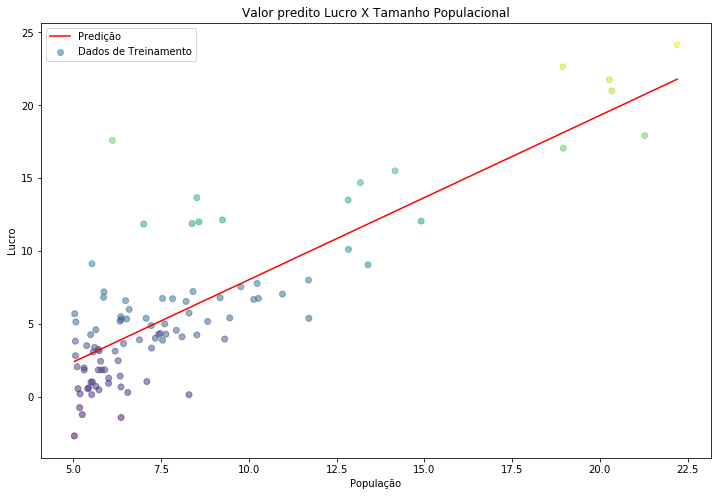

In [47]:
x = np.linspace(dados.Pop.min(), dados.Pop.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Predição')

scatter_plot = plt.scatter(dados['Pop'], dados['Lucro'], alpha=0.5, 
                           c=dados['Lucro'],label='Dados de Treinamento' )
##ax.scatter(dados.Pop, dados.Lucro, label='Dados de Treinamento')
ax.legend(loc=2)
ax.set_xlabel('População')
ax.set_ylabel('Lucro')
ax.set_title('Valor predito Lucro X Tamanho Populacional')

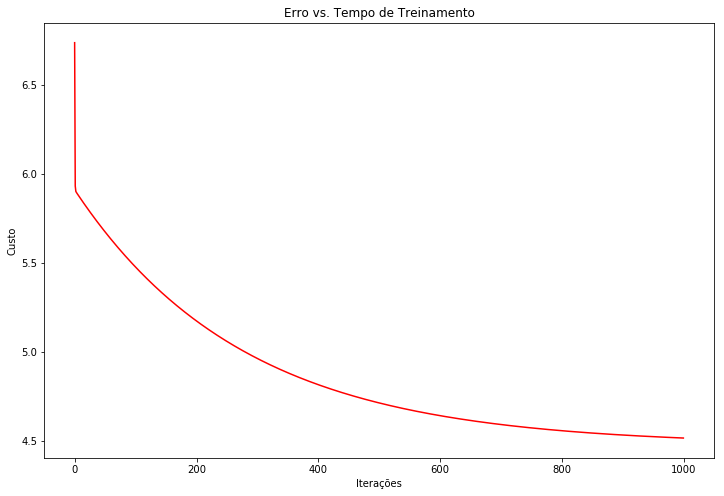

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro vs. Tempo de Treinamento')